### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
from sklearn.model_selection import train_test_split
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial import distance 
import sklearn
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, fcluster 
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv('vehicle.csv')
data.dropna(inplace=True)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

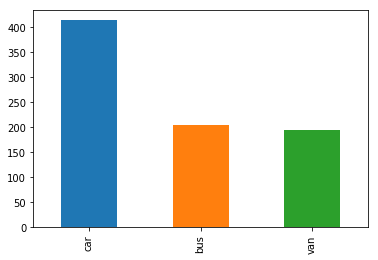

In [4]:
data["class"].value_counts().plot(kind='bar')

### Check for any missing values in the data 

In [5]:
data.isnull().values.any()

False

In [6]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [8]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['class']= label_encoder.fit_transform(data['class']) 
data_std = stats.zscore(data) 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [9]:
data_std

array([[ 0.16323063,  0.52040788,  0.06066872, ..., -0.3218087 ,
         0.17183708,  1.44341545],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.00340009,
         0.44231829,  1.44341545],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.1592043 ,
         0.03659647,  0.01753846],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.3218087 ,
         0.7127995 ,  0.01753846],
       [-0.93050425, -1.43307395, -0.25632145, ...,  0.16600449,
        -0.09864413,  0.01753846],
       [-1.05203035, -1.43307395, -1.01709784, ..., -0.4844131 ,
        -0.77484716,  1.44341545]])

### K - Means Clustering

### 4. Plotting Elbow/ Scree Plot

In [10]:
cluster_range = range(2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
distortion = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data_std)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
  cluster_sil_scores.append(metrics.silhouette_score(data_std, labels, metric='euclidean'))
  distortion.append(sum(np.min(distance.cdist(data_std, clusters.cluster_centers_, 'euclidean'), axis=1))/ data_std.shape[0])

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors, "Avg Sil Score": cluster_sil_scores, 'distortion':distortion } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score,distortion
0,2,9415.219195,0.369404,3.133256
1,3,7832.638124,0.273598,2.832046
2,4,6528.839283,0.285851,2.739875
3,5,5881.000921,0.260022,2.591610


Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

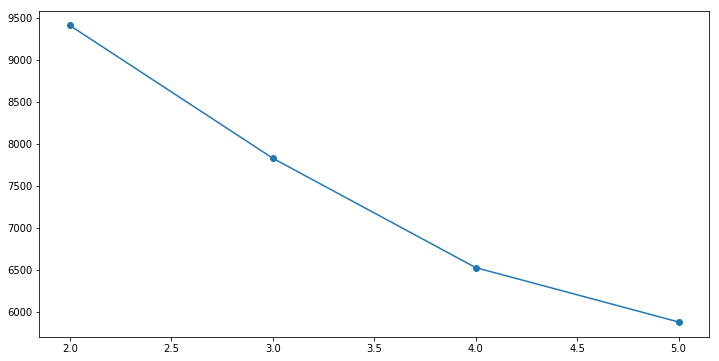

In [11]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

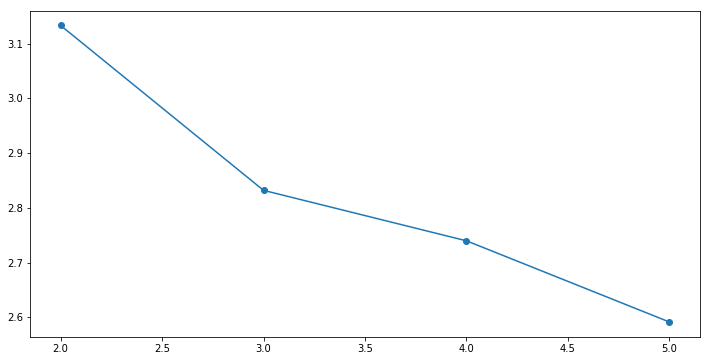

In [14]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, distortion, marker = "o" ) 

### Find out the optimal value of K

The elbow plot confirms our visual analysis that there is likely 3 or 4 good clusters The optimal value of K could also be derived based on domain knowledge Since the elbow bends at 3 and 4 with "error" and "distortion". Lets start with K = 4 as we know there are 3 categories of vehicles already.

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [15]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(data_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [16]:
centroids = cluster.cluster_centers_
centroids

array([[-1.84109923e-01, -5.98341465e-01, -2.95889013e-01,
         6.35980127e-03,  1.92467946e-01, -1.74427953e-01,
        -4.36734158e-01,  2.93798644e-01, -4.69498145e-01,
        -5.60320738e-01, -4.01268225e-01, -4.40500168e-01,
        -6.24239407e-01, -6.95670110e-01, -2.89854965e-02,
         3.89940840e-02,  9.35780623e-01,  7.95766256e-01,
         1.23720791e-01],
       [ 1.15736176e+00,  1.18688991e+00,  1.21376707e+00,
         9.73764988e-01,  9.46906393e-02,  2.19180218e-01,
         1.30158336e+00, -1.21649970e+00,  1.30627647e+00,
         1.10069002e+00,  1.20916828e+00,  1.31287479e+00,
         1.09370231e+00, -1.03892856e-01,  1.58104393e-01,
         2.69747448e-01, -1.70122247e-03,  1.87217384e-01,
        -2.28495214e-01],
       [-8.85612148e-01, -5.01889980e-01, -8.35419899e-01,
        -1.02121269e+00, -4.96698840e-01, -2.84611630e-01,
        -7.62927838e-01,  8.34426208e-01, -7.32249161e-01,
        -4.66167130e-01, -7.78957061e-01, -7.68124913e-01,
    

### 5. Store the centroids in a dataframe with column names from the original dataset given 

In [17]:
# Let us put the raw centroid values into a dataframe under respective columns
#data = data.pop("Cluster_Lablel")
centroid_df = pd.DataFrame(centroids, columns = list(data))
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,-0.184110,-0.598341,-0.295889,0.006360,0.192468,-0.174428,-0.436734,0.293799,-0.469498,-0.560321,-0.401268,-0.440500,-0.624239,-0.695670,-0.028985,0.038994,0.935781,0.795766,0.123721
1,1.157362,1.186890,1.213767,0.973765,0.094691,0.219180,1.301583,-1.216500,1.306276,1.100690,1.209168,1.312875,1.093702,-0.103893,0.158104,0.269747,-0.001701,0.187217,-0.228495
2,-0.885612,-0.501890,-0.835420,-1.021213,-0.496699,-0.284612,-0.762928,0.834426,-0.732249,-0.466167,-0.778957,-0.768125,-0.390150,0.682636,-0.111731,-0.290792,-0.961912,-1.001930,0.065422
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651,0.730477


Hint: Use pd.Dataframe function 

In [18]:
labels = cluster.labels_

In [19]:
labels

array([0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1,
       2, 2, 1, 2, 3, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       2, 1, 2, 2, 3, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

### Use kmeans.labels_ function to print out the labels of the classes

In [20]:
data1 = data
prediction=cluster.predict(data_std)
data1["Cluster_Label"] = prediction
data1.groupby("Cluster_Label").count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
Cluster_Label,,,,,,,,,,,,,,,,,,,
0,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282
1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
2,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268
3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


## Hierarchical Clustering 

### 6. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [22]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 7. Combine all three arrays a,b,c into a dataframe

In [23]:
tuple = np.concatenate((a, b, c), axis=0)
cdata = pd.DataFrame(data=tuple)

### 8. Use scatter matrix to print all the 3 distributions

C:\Users\i017121\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\i017121\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


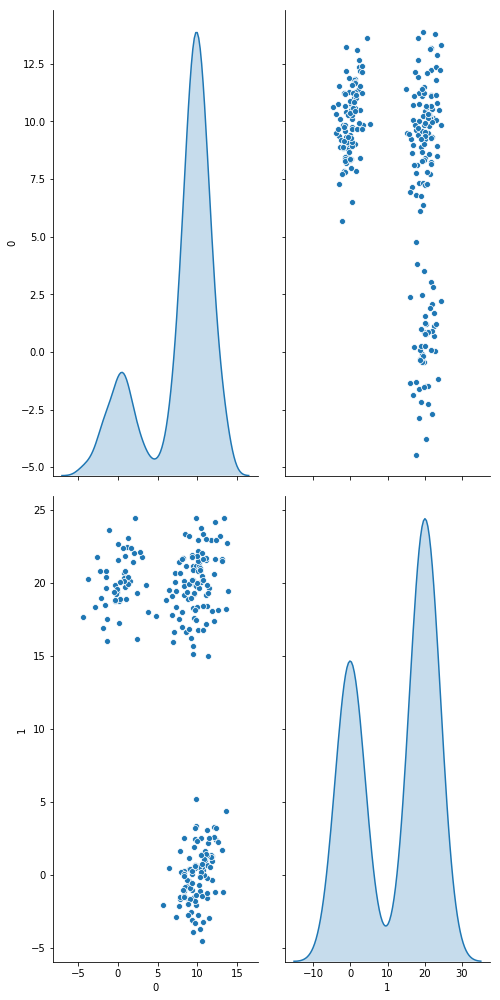

In [24]:
sns.pairplot(cdata, size=7,aspect=0.5 , diag_kind='kde')

3rd cluster is eclipsed behind first one.

### 9. Find out the linkage matrix

In [26]:
lmat = linkage(cdata, 'ward', metric='euclidean')

Use ward as linkage metric and distance as Eucledian

### 10. Plot the dendrogram for the consolidated dataframe

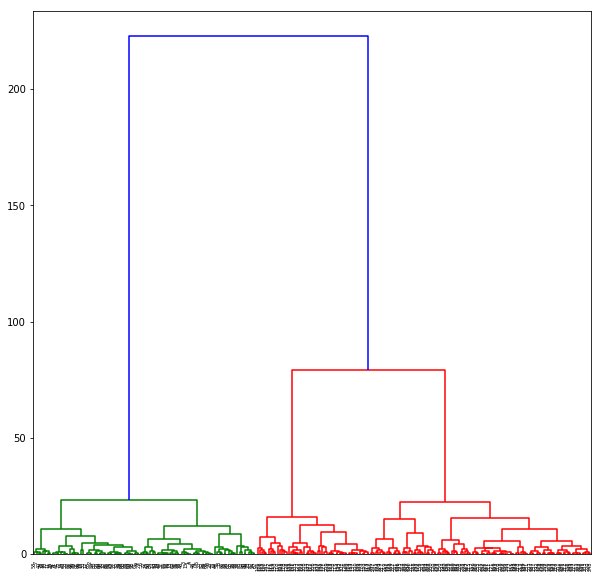

In [27]:
plt.figure(figsize=(10,10))
dn = dendrogram(lmat)

### 11. Recreate the dendrogram for last 12 merged clusters 

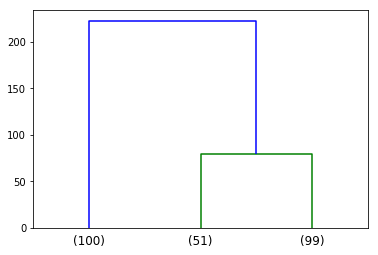

In [28]:
dendrogram(
    lmat,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show() 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 12. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

The optimal distance is 87 as at t=88 the cluster count changes to 2. Refer Q13 as well.

### 13. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [31]:
threshold=fcluster(lmat, t=87, criterion='distance') 

In [32]:
fcluster(lmat, t=88, criterion='distance') 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

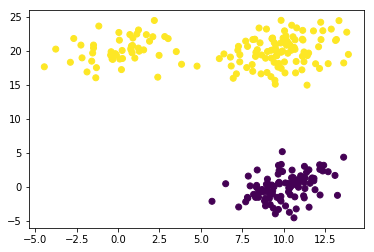

In [33]:
plt.scatter(x=cdata[0], y=cdata[1] , c=threshold ) 